In [2]:
import sys, os
import re
from collections import defaultdict
import numpy as np
import pandas as pd

%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina', 'png')
from matplotlib.patches import Rectangle, Polygon
import seaborn as sns
sns.set_style('white')

import geneinfo as gi
gi.email('ariadna.saez@alum.esci.upf.edu')


# # for use on the cluster
#%env ftp_proxy http://proxy-default:3128

%env http_proxy=http://proxy-default:3128
# %env https_proxy=http://proxy-default:3128
# %env ftp_proxy=http://proxy-default:3128
# %env ftps_proxy=http://proxy-default:3128

env: http_proxy=http://proxy-default:3128


In [5]:
# green region
gi.gene_info_region('chrX', 18420000, 18480000, assembly='hg38')

**Symbol:** **_CDKL5_** (protein-coding) &nbsp; &nbsp; &nbsp; &nbsp; **Aliases:** CFAP247, DEE2, EIEE2, ISSX, STK9  
*cyclin dependent kinase like 5*  
**Summary:** This gene is a member of Ser/Thr protein kinase family and encodes a phosphorylated protein with protein kinase activity. Mutations in this gene have been associated with X-linked infantile spasm syndrome (ISSX), also known as X-linked West syndrome, and Rett syndrome (RTT). Alternate transcriptional splice variants have been characterized. [provided by RefSeq, Jul 2008].  
**Genomic position:** X:18425583-18653629 (hg38), X:18443703-18671749 (hg19)  
[Gene card](https://www.genecards.org/cgi-bin/carddisp.pl?gene=CDKL5)  


 ----

**Symbol:** **_CDKL5_** (protein-coding) &nbsp; &nbsp; &nbsp; &nbsp; **Aliases:** CFAP247, DEE2, EIEE2, ISSX, STK9  
*cyclin dependent kinase like 5*  
**Summary:** This gene is a member of Ser/Thr protein kinase family and encodes a phosphorylated protein with protein kinase activity. Mutations in this gene have been associated with X-linked infantile spasm syndrome (ISSX), also known as X-linked West syndrome, and Rett syndrome (RTT). Alternate transcriptional splice variants have been characterized. [provided by RefSeq, Jul 2008].  
**Genomic position:** X:18425583-18653629 (hg38), X:18443703-18671749 (hg19)  
[Gene card](https://www.genecards.org/cgi-bin/carddisp.pl?gene=CDKL5)  


 ----

**Symbol:** **_CDKL5_** (protein-coding) &nbsp; &nbsp; &nbsp; &nbsp; **Aliases:** CFAP247, DEE2, EIEE2, ISSX, STK9  
*cyclin dependent kinase like 5*  
**Summary:** This gene is a member of Ser/Thr protein kinase family and encodes a phosphorylated protein with protein kinase activity. Mutations in this gene have been associated with X-linked infantile spasm syndrome (ISSX), also known as X-linked West syndrome, and Rett syndrome (RTT). Alternate transcriptional splice variants have been characterized. [provided by RefSeq, Jul 2008].  
**Genomic position:** X:18425583-18653629 (hg38), X:18443703-18671749 (hg19)  
[Gene card](https://www.genecards.org/cgi-bin/carddisp.pl?gene=CDKL5)  


 ----

In [3]:
# blue region
gi.gene_info_region('chrX', 23371000, 23776000, assembly='hg38')

**Symbol:** **_PTCHD1_** (protein-coding) &nbsp; &nbsp; &nbsp; &nbsp; **Aliases:** AUTSX4, CXDELp22.11, DELXP22.11  
*patched domain containing 1*  
**Summary:** This gene encodes a membrane protein with a patched domain. The encoded protein is similar to Drosophila proteins which act as receptors for the morphogen sonic hedgehog. Deletions in this gene, which is located on the X chromosome, are associated with intellectual disability and autism (PMID: 21091464, PMID: 20844286). [provided by RefSeq, Aug 2011].  
**Genomic position:** X:23334849-23404374 (hg38), X:23352133-23422489 (hg19)  
[Gene card](https://www.genecards.org/cgi-bin/carddisp.pl?gene=PTCHD1)  


 ----

**Symbol:** **_PTCHD1_** (protein-coding) &nbsp; &nbsp; &nbsp; &nbsp; **Aliases:** AUTSX4, CXDELp22.11, DELXP22.11  
*patched domain containing 1*  
**Summary:** This gene encodes a membrane protein with a patched domain. The encoded protein is similar to Drosophila proteins which act as receptors for the morphogen sonic hedgehog. Deletions in this gene, which is located on the X chromosome, are associated with intellectual disability and autism (PMID: 21091464, PMID: 20844286). [provided by RefSeq, Aug 2011].  
**Genomic position:** X:23334849-23404374 (hg38), X:23352133-23422489 (hg19)  
[Gene card](https://www.genecards.org/cgi-bin/carddisp.pl?gene=PTCHD1)  


 ----

**Symbol:** **_LOC124905276_** (snoRNA)  
*small nucleolar RNA U13*  
[Gene card](https://www.genecards.org/cgi-bin/carddisp.pl?gene=LOC124905276)  


 ----

**Symbol:** **_PRDX4_** (protein-coding) &nbsp; &nbsp; &nbsp; &nbsp; **Aliases:** AOE37-2, AOE372, HEL-S-97n, PRX-4  
*peroxiredoxin 4*  
**Summary:** The protein encoded by this gene is an antioxidant enzyme and belongs to the peroxiredoxin family. The protein is localized to the cytoplasm. Peroxidases of the peroxiredoxin family reduce hydrogen peroxide and alkyl hydroperoxides to water and alcohol with the use of reducing equivalents derived from thiol-containing donor molecules. This protein has been found to play a regulatory role in the activation of the transcription factor NF-kappaB. [provided by RefSeq, Jul 2008].  
**Genomic position:** X:23664262-23686397 (hg38), X:23682379-23704516 (hg19)  
[Gene card](https://www.genecards.org/cgi-bin/carddisp.pl?gene=PRDX4)  


 ----

**Symbol:** **_ACOT9_** (protein-coding) &nbsp; &nbsp; &nbsp; &nbsp; **Aliases:** ACATE2, CGI-16, MT-ACT48, MTACT48  
*acyl-CoA thioesterase 9*  
**Summary:** The protein encoded by this gene is a mitochondrial acyl-CoA thioesterase of unknown function. Two transcript variants encoding different isoforms have been found for this gene. [provided by RefSeq, Mar 2010].  
**Genomic position:** X:23701055-23766475 (hg38), X:23720370-23784592 (hg19)  
[Gene card](https://www.genecards.org/cgi-bin/carddisp.pl?gene=ACOT9)  


 ----

**Symbol:** **_ACOT9_** (protein-coding) &nbsp; &nbsp; &nbsp; &nbsp; **Aliases:** ACATE2, CGI-16, MT-ACT48, MTACT48  
*acyl-CoA thioesterase 9*  
**Summary:** The protein encoded by this gene is a mitochondrial acyl-CoA thioesterase of unknown function. Two transcript variants encoding different isoforms have been found for this gene. [provided by RefSeq, Mar 2010].  
**Genomic position:** X:23701055-23766475 (hg38), X:23720370-23784592 (hg19)  
[Gene card](https://www.genecards.org/cgi-bin/carddisp.pl?gene=ACOT9)  


 ----

**Symbol:** **_ACOT9_** (protein-coding) &nbsp; &nbsp; &nbsp; &nbsp; **Aliases:** ACATE2, CGI-16, MT-ACT48, MTACT48  
*acyl-CoA thioesterase 9*  
**Summary:** The protein encoded by this gene is a mitochondrial acyl-CoA thioesterase of unknown function. Two transcript variants encoding different isoforms have been found for this gene. [provided by RefSeq, Mar 2010].  
**Genomic position:** X:23701055-23766475 (hg38), X:23720370-23784592 (hg19)  
[Gene card](https://www.genecards.org/cgi-bin/carddisp.pl?gene=ACOT9)  


 ----

**Symbol:** **_SAT1-DT_**   
*SAT1 divergent transcript*  
**Genomic position:** X:23772992-23782956 (hg38), X:23791109-23801073 (hg19)  
[Gene card](https://www.genecards.org/cgi-bin/carddisp.pl?gene=SAT1-DT)  


 ----

**Symbol:** **_SAT1-DT_**   
*SAT1 divergent transcript*  
**Genomic position:** X:23772992-23782956 (hg38), X:23791109-23801073 (hg19)  
[Gene card](https://www.genecards.org/cgi-bin/carddisp.pl?gene=SAT1-DT)  


 ----

**Symbol:** **_SAT1-DT_**   
*SAT1 divergent transcript*  
**Genomic position:** X:23772992-23782956 (hg38), X:23791109-23801073 (hg19)  
[Gene card](https://www.genecards.org/cgi-bin/carddisp.pl?gene=SAT1-DT)  


 ----

**Symbol:** **_SAT1-DT_**   
*SAT1 divergent transcript*  
**Genomic position:** X:23772992-23782956 (hg38), X:23791109-23801073 (hg19)  
[Gene card](https://www.genecards.org/cgi-bin/carddisp.pl?gene=SAT1-DT)  


 ----

**Symbol:** **_SAT1-DT_**   
*SAT1 divergent transcript*  
**Genomic position:** X:23772992-23782956 (hg38), X:23791109-23801073 (hg19)  
[Gene card](https://www.genecards.org/cgi-bin/carddisp.pl?gene=SAT1-DT)  


 ----

**Symbol:** **_SAT1-DT_**   
*SAT1 divergent transcript*  
**Genomic position:** X:23772992-23782956 (hg38), X:23791109-23801073 (hg19)  
[Gene card](https://www.genecards.org/cgi-bin/carddisp.pl?gene=SAT1-DT)  


 ----

**Symbol:** **_SAT1-DT_**   
*SAT1 divergent transcript*  
**Genomic position:** X:23772992-23782956 (hg38), X:23791109-23801073 (hg19)  
[Gene card](https://www.genecards.org/cgi-bin/carddisp.pl?gene=SAT1-DT)  


 ----

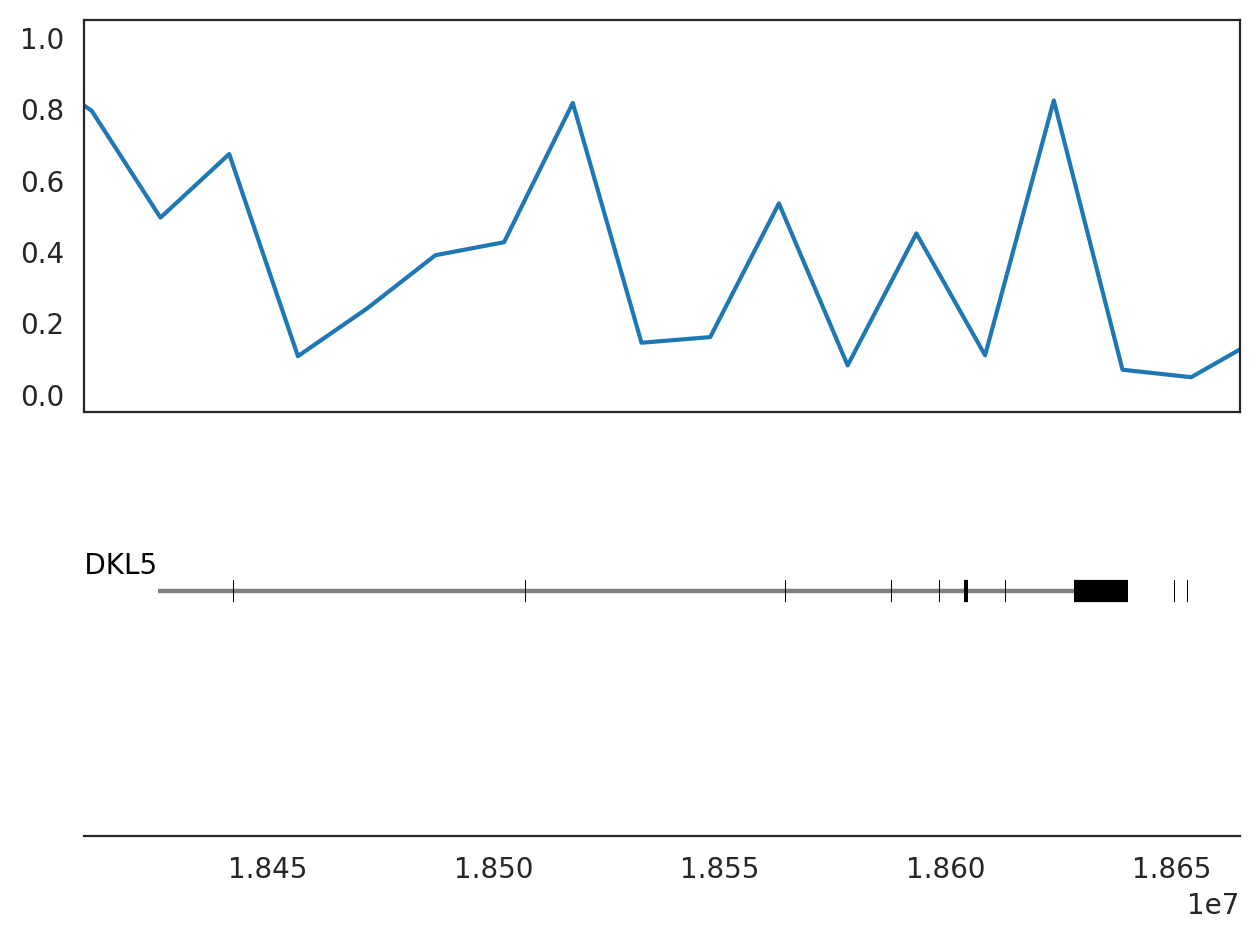

In [6]:
x = np.linspace(1, 1520300000, 100000)
y = np.random.random(100000)
ax = gi.gene_plot('chrX', 18420000, 18480000,'hg38')
ax.plot(x, y)
plt.tight_layout()

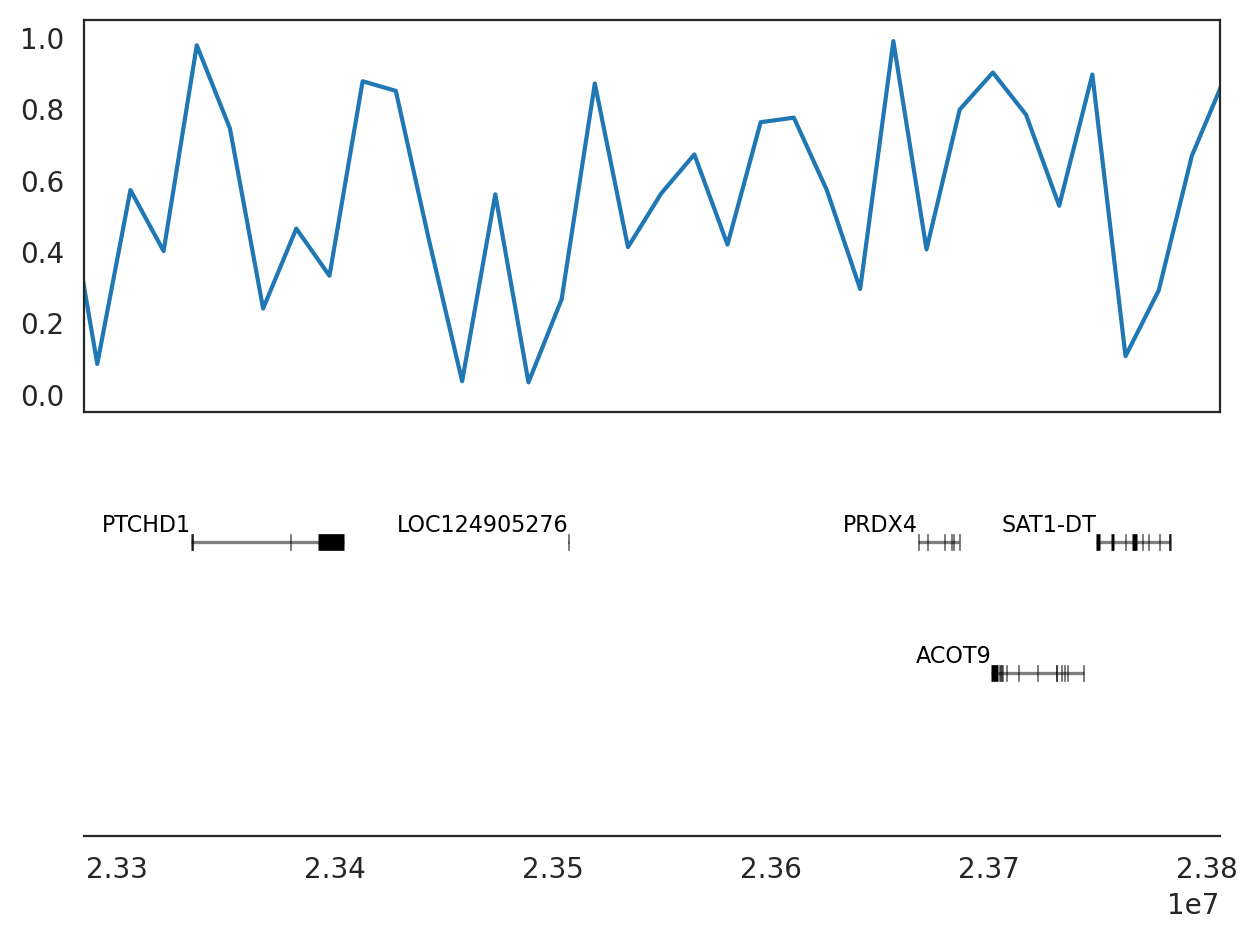

In [7]:
x = np.linspace(1, 1520300000, 100000)
y = np.random.random(100000)
ax = gi.gene_plot('chrX', 23371000, 23776000,'hg38')
ax.plot(x, y)
plt.tight_layout()

In [6]:
# just take SNPs above the threshold
all_data = pd.read_csv("/home/ari/ari-intern/people/ari/ariadna-intern/notebooks/africans_low_pvalue.csv")

data = all_data.iloc[:, [0, -3, -2, -1]]

# just take needed columns
print(data)

         pos  when_DAF_is_half  when_mutation_has_freq2 population
0   17951099         -1.572070                 -6.61750        LWK
1   20315815         -2.395940                 -9.37493        LWK
2   20317564         -1.141920                 -7.23160        LWK
3   23370843         -3.826400                 -7.05065        LWK
4   10433671         -0.521846                 -6.72735        ESN
5   18440969         -1.229320                 -6.37140        ESN
6   18447244         -1.079630                 -6.16464        ESN
7   18481819         -0.740967                 -6.16464        ESN
8   18483252         -0.740967                 -6.16464        ESN
9   35325695         -1.300010                 -6.15811        ESN
10  35509359         -1.854430                 -6.66346        ESN
11   5444732         -5.617370                 -6.25964        GWD
12  19973392         -0.543084                 -6.06747        GWD
13  20142128         -1.192610                 -6.37256       

In [14]:
# Define populations
populations = data['population'].unique()

# Dictionary to store gene regions for each population
gene_regions = {}

for population in populations:
    # Filter data for the current population
    population_data = data[data['population'] == population]
    
    # Initialize a list to store gene regions for the current population
    population_gene_regions = []
    
    # Iterate over rows and calculate gene regions
    for index, row in population_data.iterrows():
        genomic_position = row['pos']
        window_size = 1000  # Set your desired window size here
        x_min, x_max = get_window_range(genomic_position, window_size)
        
        # Call gi.get_genes_region() for the current region
        gene_region = gi.get_genes_region('chrX', x_min, x_max, assembly='hg38')
        
        # Extract gene symbol, start position, and end position from the result
        if gene_region:  # Check if gene_region is not empty
            gene_symbol = gene_region[0][0]
            start_position = gene_region[0][1]
            end_position = gene_region[0][2]
            
            # Append the extracted information to the list of gene regions for the current population
            population_gene_regions.append((gene_symbol, start_position, end_position))
    
    # Store the list of gene regions for the current population in the dictionary
    gene_regions[population] = population_gene_regions

# Print gene regions for all populations
for population, regions in gene_regions.items():
    print(f"Gene regions for {population}:")
    for region in regions:
        print(region)

Gene regions for LWK:
('PTCHD1', 23334395, 23404374)
Gene regions for ESN:
('CDKL5', 18425607, 18640196)
('CDKL5', 18425607, 18640196)
('CDKL5', 18425607, 18640196)
('CDKL5', 18425607, 18640196)
Gene regions for GWD:
('BCLAF3', 19912859, 19988498)
('EIF1AX', 20124524, 20141838)
('PTCHD1-AS', 22193004, 23293146)
('PTCHD1', 23334395, 23404374)
('IL1RAPL1', 28587445, 29956718)
('DMD', 31119221, 32412228)
Gene regions for MSL:
('LOC105373153', 33726365, 34077114)
Gene regions for YRI:
('PRKX', 3604339, 3713649)
('CDKL5', 18425607, 18640196)
('PTCHD1', 23334395, 23404374)


In [15]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.
